In [5]:
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import torch.nn as nn
import numpy as np
import torch
%matplotlib inline

In [163]:
# 准备数据
x=np.linspace(-6,6,400)
y=1000*np.abs(np.exp(-0.2*x)*np.power(np.sin(x), 2))
print(y)
# 将数据做成数据集的模样
X=np.expand_dims(x,axis=1)
Y=y.reshape(400,-1)
# 使用批训练方式
device = 'cuda' if torch.cuda.is_available() else 'cpu'
dataset=TensorDataset(torch.tensor(X,dtype=torch.float),torch.tensor(Y,dtype=torch.float))
dataloader=DataLoader(dataset,batch_size=400,shuffle=True)



[2.59211557e+02 3.13400365e+02 3.71735741e+02 4.33920692e+02
 4.99648011e+02 5.68601515e+02 6.40457295e+02 7.14884988e+02
 7.91549051e+02 8.70110037e+02 9.50225878e+02 1.03155315e+03
 1.11374836e+03 1.19646913e+03 1.27937552e+03 1.36213115e+03
 1.44440441e+03 1.52586961e+03 1.60620808e+03 1.68510927e+03
 1.76227171e+03 1.83740409e+03 1.91022612e+03 1.98046945e+03
 2.04787848e+03 2.11221116e+03 2.17323969e+03 2.23075117e+03
 2.28454822e+03 2.33444947e+03 2.38029006e+03 2.42192203e+03
 2.45921464e+03 2.49205466e+03 2.52034656e+03 2.54401264e+03
 2.56299312e+03 2.57724609e+03 2.58674751e+03 2.59149105e+03
 2.59148790e+03 2.58676652e+03 2.57737234e+03 2.56336738e+03
 2.54482983e+03 2.52185356e+03 2.49454763e+03 2.46303565e+03
 2.42745521e+03 2.38795719e+03 2.34470503e+03 2.29787403e+03
 2.24765056e+03 2.19423121e+03 2.13782200e+03 2.07863750e+03
 2.01689994e+03 1.95283833e+03 1.88668752e+03 1.81868731e+03
 1.74908148e+03 1.67811689e+03 1.60604253e+03 1.53310859e+03
 1.45956554e+03 1.385663

In [164]:
# 神经网络主要结构，这里就是一个简单的线性结构
import time
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.net=nn.Sequential(
            nn.Linear(in_features=1,out_features=100),nn.ReLU(),
            nn.Linear(100,100),nn.ReLU(),
            nn.Linear(100,100),nn.ReLU(),
            nn.Linear(100,100),nn.ReLU(),
            nn.Linear(100,100),nn.ReLU(),
            nn.Linear(100,1)
        )

    def forward(self, input:torch.FloatTensor):
        return self.net(input)

net=Net().to(device)

# 定义优化器和损失函数
optim=torch.optim.Adam(Net.parameters(net),lr=0.0001)
Loss=nn.MSELoss()

losslist = []
# 下面开始训练：
# 一共训练 1000次
for epoch in range(50000):
    loss=None
    for batch_x,batch_y in dataloader:
        y_predict=net(batch_x.to(device))
        loss=Loss(y_predict,batch_y.to(device))
        losslist.append(loss.item())
        optim.zero_grad()
        loss.backward()
        optim.step()
    # 每100次 的时候打印一次日志
    if (epoch+1)%100==0:
        print("step: {0} , loss: {1}".format(epoch+1,loss.item()))
end = time.time()

# 使用训练好的模型进行预测


step: 100 , loss: 904413.125
step: 200 , loss: 738352.9375
step: 300 , loss: 292460.75
step: 400 , loss: 271273.96875
step: 500 , loss: 268250.65625
step: 600 , loss: 265363.3125
step: 700 , loss: 262637.875
step: 800 , loss: 260039.234375
step: 900 , loss: 257644.109375
step: 1000 , loss: 255529.234375
step: 1100 , loss: 253728.953125
step: 1200 , loss: 252236.1875
step: 1300 , loss: 250975.328125
step: 1400 , loss: 249879.234375
step: 1500 , loss: 248879.640625
step: 1600 , loss: 247903.53125
step: 1700 , loss: 246915.6875
step: 1800 , loss: 245896.1875
step: 1900 , loss: 244827.109375
step: 2000 , loss: 243677.59375
step: 2100 , loss: 242394.78125
step: 2200 , loss: 240975.890625
step: 2300 , loss: 239360.078125
step: 2400 , loss: 237490.453125
step: 2500 , loss: 235324.171875
step: 2600 , loss: 232781.09375
step: 2700 , loss: 229598.390625
step: 2800 , loss: 225591.921875
step: 2900 , loss: 220445.453125
step: 3000 , loss: 212938.609375
step: 3100 , loss: 203992.0
step: 3200 , loss

step: 22600 , loss: 5.775994777679443
step: 22700 , loss: 5.746915340423584
step: 22800 , loss: 5.71312141418457
step: 22900 , loss: 5.729667663574219
step: 23000 , loss: 5.876270771026611
step: 23100 , loss: 5.747371673583984
step: 23200 , loss: 5.63050651550293
step: 23300 , loss: 5.591358661651611
step: 23400 , loss: 5.542576789855957
step: 23500 , loss: 5.567429065704346
step: 23600 , loss: 5.545205116271973
step: 23700 , loss: 5.519460201263428
step: 23800 , loss: 5.464761734008789
step: 23900 , loss: 5.53410530090332
step: 24000 , loss: 5.497453689575195
step: 24100 , loss: 6.957831859588623
step: 24200 , loss: 6.649842262268066
step: 24300 , loss: 5.632236957550049
step: 24400 , loss: 7.148651123046875
step: 24500 , loss: 9.378575325012207
step: 24600 , loss: 5.732707500457764
step: 24700 , loss: 5.331416130065918
step: 24800 , loss: 5.28300142288208
step: 24900 , loss: 5.248212814331055
step: 25000 , loss: 5.2101263999938965
step: 25100 , loss: 5.601077556610107
step: 25200 , l

KeyboardInterrupt: 

In [165]:
predict=net(torch.tensor(X,dtype=torch.float).to(device))

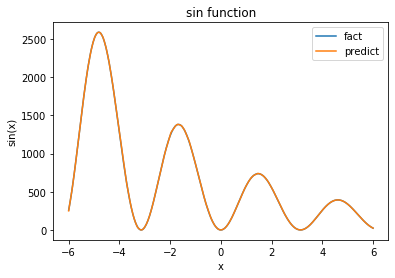

In [166]:
# 绘图展示预测的和真实数据之间的差异
import matplotlib.pyplot as plt
plt.plot(x,y,label="fact")
plt.plot(x,predict.cpu().detach().numpy(),label="predict")
plt.title("sin function")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.legend()
plt.savefig(fname="result.png",figsize=[10,10])
plt.show()

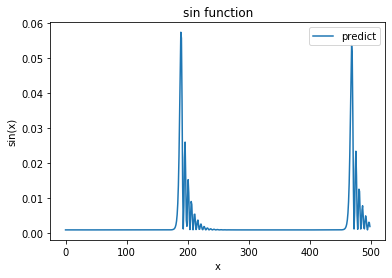

In [65]:
import matplotlib.pyplot as plt
plt.plot(losslist[49500:50000],label="predict")
plt.title("sin function")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.legend()
plt.savefig(fname="result.png",figsize=[10,10])
plt.show()

In [ ]:
step: 1000 , loss: 0.14635227620601654
step: 10000 , loss: 0.0023346818052232265
                    0.000641039339825511
                    0.0019636759534478188

In [77]:
x = torch.tensor(5, 3, dtype=torch.double).to(device)

TypeError: tensor() takes 1 positional argument but 2 were given

In [84]:
x = torch.ones(100, 100, dtype=torch.double).to(device)
print(x)

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]], device='cuda:0', dtype=torch.float64)


In [91]:
start = time.time()
for i in range(50000):
    y = torch.mm(x, x)
end = time.time()
print(end - start)

1.1559545993804932


In [92]:
print(y)

tensor([[100., 100., 100.,  ..., 100., 100., 100.],
        [100., 100., 100.,  ..., 100., 100., 100.],
        [100., 100., 100.,  ..., 100., 100., 100.],
        ...,
        [100., 100., 100.,  ..., 100., 100., 100.],
        [100., 100., 100.,  ..., 100., 100., 100.],
        [100., 100., 100.,  ..., 100., 100., 100.]], device='cuda:0',
       dtype=torch.float64)
